1) Crie um algoritmo que implemente filtros de convolução. O algoritmo deverá receber como parâmetro a imagem a ser processada, o filtro e o tratamento a ser feito na borda. A função, obrigatoriamente, deverá seguir a seguinte nomenclatura:

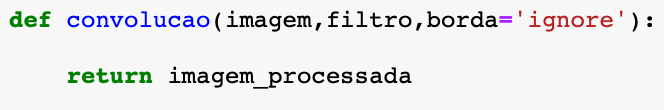

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
from skimage.io import imread, imsave, imshow

In [ ]:
filtroLaplaciano = {
    'M': 3,
    'N': 3,
    'nome': 'Laplaciano',
    'filtro': np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
}

In [ ]:
filtroMedia = {
    'M': 3,
    'N': 3,
    'nome': 'Media',
    'filtro': np.ones((3,3))/9
}

In [ ]:
filtroGaussiano = {
    'M': 5,
    'N': 5,
    'nome': 'Gaussiano',
    'filtro': np.array([[1,4,7,4,1], 
                        [4,16,26,16,4], 
                        [7,26,41,26,7],
                        [4,16,26,16,4],
                        [1,4,7,4,1]])
}

In [ ]:
filtroPrewitt = {
    'M':3,
    'N':3,
    'nome':'Prewitt',
    'horizontal':np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    'vertical':np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
}

In [ ]:
filtroSobel = {
    'M':3,
    'N':3,
    'nome':'Sobel',
    'horizontal': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'vertical': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
}

A imagem poderá ser colorida ou em tons de cinza. No caso de imagens coloridas, o processamento deverá ser feito em cada banda de cor o resultado será retornado em uma única imagem;

In [ ]:
Imagem = imread('Imagem.jpg')
Imagem = rgb2gray(Imagem)
imagem_nova = imread('Imagem-01.jpg')
imagem_nova = rgb2gray(imagem_nova)

In [ ]:
imshow(Imagem)

In [ ]:
def quebralista(lista, n):
    for i in range(0,len(lista),n):
        yield lista[i:i + n]

In [ ]:
def janelaignorada(imagem,i,j,m,n,t):
    if t == -1:
        altura, largura = imagem.shape
    else:
        altura, largura, _ = imagem.shape
    janela = []    
    a = int((m-1)/2)
    b = int((n-1)/2)
    new_a = a*(-1)
    new_b = b*(-1)
    for x in range(m):
        b = new_b
        for y in range(n):
            i_atual = i+new_a
            j_atual = j+b
            if t != -1:
                janela.append(imagem[i_atual][j_atual][t])
            else:
                janela.append(imagem[i_atual][j_atual])
            b+=1
        new_a+=1
    janela = list(quebralista(janela,n))
    janela = np.array(janela)
    return janela

In [ ]:
def janelapadding(imagem,i,j,m,n,t):
    if t == -1:
        altura, largura = imagem.shape
    else:
        altura, largura, _ = imagem.shape
    janela = []    
    a = int((m-1)/2)
    b = int((n-1)/2)
    new_a = a*(-1)
    new_b = b*(-1)
    for x in range(m):
        b = new_b
        for y in range(n):
            i_atual = i+a
            j_atual = j+b   
            if (i_atual > -1 and  j_atual > -1) and (i_atual < altura and j_atual < largura):
                if t != -1:
                    janela.append(imagem[i_atual][j_atual][t])
                else:
                    janela.append(imagem[i_atual][j_atual])
            else:
                janela.append(0)
            b += 1
        a += 1
    janela = list(quebralista(janela,n))
    janela = np.array(janela)
    return janela  

In [ ]:
def janelareplicada(imagem,i,j,m,n,t):
    if t == -1:
        altura, largura = imagem.shape
    else:
        altura, largura, _ = imagem.shape
    janela = []    
    a = int((m-1)/2)
    b = int((n-1)/2)
    new_a = a*(-1)
    new_b = b*(-1)   
    for x in range(m):
        b = new_b
        for y in range(n):
            i_atual = i+new_a
            j_atual = j+b   
            if i_atual < 0: i_atual = 0
            elif i_atual >= altura: i_atual = altura-1
            if j_atual < 0: j_atual = 0
            elif j_atual >= largura: j_atual = largura-1
            if t == -1: janela.append(imagem[i_atual][j_atual])
            else: janela.append(imagem[i_atual][j_atual][t])
            b += 1
        new_a += 1
    janela = list(quebralista(janela,n))
    janela = np.array(janela)
    return janela

In [ ]:
def janelaespelhada(imagem,i,j,m,n,t):
    if t == -1:
        altura, largura = imagem.shape
    else:
        altura, largura, _ = Imagem.shape
    janela = []    
    a = int((m-1)/2)
    b = int((n-1)/2)
    new_a = a*(-1)
    new_b = b*(-1)   
    for x in range(m):
        b = new_b
        for y in range(m):
            i_atual = i+new_a
            j_atual = j+b   
            if i_atual < 0: i_atual = altura+i_atual
            elif i_atual >= altura: i_atual = i_atual-altura
            if j_atual < 0: j_atual = largura+j_atual
            elif j_atual >= largura: j_atual = j_atual-largura
            if t == -1: janela.append(Imagem[i_atual][j_atual])
            else: janela.append(Imagem[i_atual][j_atual][t])
            b += 1
        new_a += 1 
    janela = list(quebralista(janela,n))
    janela = np.array(janela)
    print(janela)
    return janela

In [ ]:
def imagemrgb(imagem,filtro,borda='ignore'):
    altura, largura, dimensao = imagem.shape
    resultados = []
    imagem_nova = np.zeros((altura,largura,3),'uint8')
    if borda != 'ignore':
        for I in range(altura):
                for J in range(largura):
                    for D in range(dimensao):
                        if borda == 'padding':
                            pixel = janelapadding(Imagem,I,J,filtro['M'],filtro['N'],D)
                        elif borda == 'espelho':
                            pixel = janelaespelhada(Imagem,I,J,filtro['M'],filtro['N'],D)
                        elif borda == 'replicar':
                            pixel = janelareplicada(Imagem,I,J,filtro['M'],filtro['N'],D)
                        else: 
                            pass
                        if filtro['nome'] == 'Prewitt' or filtro['nome'] == 'Sobel':
                            Horizontal = np.sum(filtro['horizontal']*pixel)
                            Vertical = np.sum(filtro['vertical']*pixel)
                            Resultado = np.sqrt(pow(Horizontal,2.0)+pow(Vertical,2.0))
                            imagem_nova[I][J][D] = Resultado
                        else:
                            imagem_nova[I][J][D] = np.sum(filtro['filtro']*pixel)
    else:
        a = int((filtro['M']-1)/2)
        b = int((filtro['N']-1)/2)
        for I in range(a,altura-a):
            for J in range(b,largura-b):
                for D in range(dimensao):
                    pixel = janelaignorada(Imagem,I,J,filtro['M'],filtro['N'],D)
                    if filtro['nome'] == 'Prewitt' or filtro['nome'] == 'Sobel':
                        Horizontal = np.sum(filtro['horizontal']*pixel)
                        Vertical = np.sum(filtro['vertical']*pixel)
                        Resultado = np.sqrt(pow(Horizontal,2.0)+pow(Vertical,2.0))
                        imagem_nova[I][J][D] = Resultado
                    else:
                        imagem_nova[I][J][D] = np.sum(filtro['filtro']*pixel)
        
    return imagem_nova

In [ ]:
def imagemgray(imagem,filtro,borda='ignore'):
    altura, largura = imagem.shape
    resultados = []
    # ignore
    if borda == 'ignore':
        a = int((filtro['M']-1)/2)
        b = int((filtro['N']-1)/2)
        for I in range(a,altura-a):
            for J in range(b,largura-b):
                pixel = janelaignorada(imagem,I,J,filtro['M'],filtro['N'],-1)
                if filtro['nome'] == 'Prewitt':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0) + pow(V, 2.0))
                    imagem_nova[I][J] = R
                elif filtro['nome'] == 'Sobel':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0)+pow(V,2.0))
                    imagem_nova[I][J] = R
                else:
                    imagem_nova[I][J] = np.sum(pixel*filtro['filtro'])
    #
    elif borda == 'padding':
        for I in range(altura):
            for J in range(largura):
                pixel = janelapadding(imagem,I,J,filtro['M'],filtro['N'],-1)
                if filtro['nome'] == 'Prewitt':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0) + pow(V, 2.0))
                    imagem_nova[I][J] = R
                elif filtro['nome'] == 'Sobel':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0)+pow(V,2.0))
                    imagem_nova[I][J] = R
                else:
                    imagem_nova[I][J] = np.sum(pixel*filtro['filtro'])
    #
    elif borda == 'espelho':
        for I in range(altura):
            for J in range(largura):
                pixel = janelaespelhada(imagem,I,J,filtro['M'],filtro['N'],-1)
                if filtro['nome'] == 'Prewitt':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0) + pow(V, 2.0))
                    imagem_nova[I][J] = R
                elif filtro['nome'] == 'Sobel':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0)+pow(V,2.0))
                    imagem_nova[I][J] = R
                else:
                    imagem_nova[I][J] = np.sum(pixel*filtro['filtro'])
    #
    elif borda == 'replicar':
        for I in range(altura):
            for J in range(largura):
                pixel = janelareplicada(imagem,I,J,filtro['M'],filtro['N'],-1)
                if filtro['nome'] == 'Prewitt':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0) + pow(V, 2.0))
                    imagem_nova[I][J] = R
                elif filtro['nome'] == 'Sobel':
                    H = np.sum(filtro['horizontal']*pixel)
                    V = np.sum(filtro['vertical']*pixel)
                    R = np.sqrt(pow(H,2.0)+pow(V,2.0))
                    imagem_nova[I][J] = R
                else:
                    imagem_nova[I][J] = np.sum(pixel*filtro['filtro'])
    return imagem_nova

In [ ]:
def convolucao(imagem,filtro,borda='ignore'):
    # Verifica se a imagem é colorida ou não.
    if len(imagem.shape) == 3:
        imagem_processada = imagemrgb(imagem,filtro,borda)
    else: 
        imagem_processada = imagemgray(imagem,filtro,borda)
    return imagem_processada

In [ ]:
filtros = [filtroLaplaciano,filtroMedia,filtroGaussiano,filtroSobel,filtroPrewitt]
xbordas = ['espelho','replicar','padding']
imagens = [Imagem]

In [ ]:
I = 0
for img in imagens:
    for fil in filtros:
        for bor in xbordas:
            x = convolucao(img,fil,bor)
            imsave('imagem'+str(I)+'.jpg',x)
            I+=1

In [ ]:
x = convolucao(Imagem,filtroLaplaciano,'ignore')

In [ ]:
imshow(Imagem+imagem_nova)

In [ ]:
imsave('Nova.jpg',imagem_nova)